In [95]:
from numpy import dot
from numpy.linalg import norm
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import re
from sklearn.decomposition import PCA
import streamlit as st
from transformers import *
import copy

In [96]:
model = RobertaModel.from_pretrained("asans_roberta")
checkpoint = torch.load("asans_roberta/checkpoint_15.pt", map_location = torch.device('cpu'))
#model.load_state_dict(checkpoint['model_state_dict'])

loading configuration file asans_roberta/config.json
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.21.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file asans_roberta/pytorch_model.bin
Some weights of the model checkpoint at asans_roberta were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS e

In [125]:
# create new OrderedDict that does not contain `module.`
from collections import OrderedDict

new_state_dict = OrderedDict()
for k, v in checkpoint.items():
    name = k.replace("module.", "module.") # remove `module.`
    new_state_dict[name] = v

# load params
model.load_state_dict(new_state_dict, strict=False)

_IncompatibleKeys(missing_keys=['embeddings.position_ids', 'embeddings.word_embeddings.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.LayerNorm.weight', 'embeddings.LayerNorm.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.output.dense.weight', 'encoder.layer.0.output.dense.bias', 'encoder.layer.0.output.LayerNorm.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.1.attention.self.query.we

In [126]:
model.eval()
atokenizer = RobertaTokenizer.from_pretrained("asans_roberta")

Didn't find file asans_roberta/added_tokens.json. We won't load it.
Didn't find file asans_roberta/special_tokens_map.json. We won't load it.
Didn't find file asans_roberta/tokenizer_config.json. We won't load it.
loading file asans_roberta/vocab.json
loading file asans_roberta/merges.txt
loading file None
loading file None
loading file None
loading configuration file asans_roberta/config.json
Model config RobertaConfig {
  "_name_or_path": "asans_roberta",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transf

In [99]:
# @st.cache(allow_output_mutation=True)
# def load_model():
#     model = RobertaModel.from_pretrained("asans_roberta")
#     checkpoint = torch.load("asans_roberta/checkpoint_15.pt")
#     model.load_state_dict(checkpoint['model_state_dict'])
#     model.eval()
#     atokenizer = RobertaTokenizer.from_pretrained("asans_roberta")
#     return model, atokenizer

# with st.spinner('Model is being loaded...'):
#     model, tokenizer = load_model()

# st.write('''
#         # Extractive Text Summarization (sansrobert)
#         ''')

# file = st.file_uploader("Enter the text to summarize", type=["txt"])
# st.set_option('deprecation.showfileUploaderEncoding', False)

# def upload_predict(text_file, model, tokenizer):
#     li = s.split("।")[0:-1]
#     li = [i+"।" for i in li] 
#     li =[re.sub("(\n)","",i) for i in li]
#     print(len(li))

# with open('lion_cave_story', 'r') as f:
#     text = f.readlines()

# text

# input_text = ''.join(str(line) for line in text)

In [127]:
text = """ रघुवंशं महाकविकालिदासेन विरचितं किञ्चन महाकाव्यमस्ति। तत् एकोनविंशति-सर्गात्मकं लालित्यपूर्णं महाकाव्यम् । रघुवंशस्य कथावस्तु सूर्यवंशस्य राज्ञां वर्णनाधारितम् अस्ति । दशमसर्गादारभ्य पञ्चदशसर्गपर्यन्तं रामस्य कथा वर्णिता अस्ति। तदुतरं रामवंश्यानां ततन्नृपाणां चरितानि उपन्यस्तानि। अन्तिमः सर्गः अग्निवर्णस्य गर्भवत्याः महाराज्याः शासनाचरणेन समं समाप्यते। कालिदासः अग्निवर्णपरवर्तिनां राज्ञाम् अपि वर्णनं चिकीर्षति स्म, परम् असौ कालेन कवलीकृतः इति किंवदन्ती। तथा च कालिदासेन परतः अपि रघुवंशस्य सर्गाः लिखिताः; परन्तु ते न प्राप्यन्ते इत्यपि प्रसिद्धिः। रघुवंशे येषां राज्ञां वर्णनानि सन्ति, तेषां रामायणवर्णितनपैः सह भेदः आपतति, परन्तु वायुपुराण-वर्णितानुसारं रामवंशावल्या सह रघुवंशवर्णित-वंशावली भूयसा सामञ्जस्यं धारयति।
रघुवंशं सूर्यकुलोत्पन्नानां भूपतीनां चरितकथनात्मकं वर्तते। दिलीपपुत्रस्य रघोर्नाम्ना सकल एव सूर्यवंशो रघुवंश इति ख्यातिं गतः। सूर्यवंशस्य रघुनाम्ना प्रसिद्धेः कारणं महाकविकालिदासः वर्णयति यत्,
ततः समानीय स मानितार्थी हस्तौ स्वहस्तार्जितवीरशब्दः।
वंशस्य कर्तारमनन्तकीर्ति सुदक्षिणायां तनयं ययाचे।। इति।
महाकाव्यत्वेन
महाकाव्यस्य लक्षणानुसारं यानि लक्षणानि आवश्यकतानि, तानि रघुवंशे दरीदृश्यन्ते। महाकाव्यस्य लक्षणानुसारम् अस्मिन् रघुवंशे एककुलोत्पनाः बहवः पृथ्वीपालाः वर्णिताः। अस्मिन् अङ्गी वीरो रसः। शृङ्गार-करुण-शान्तादयः रसाः, नाटकस्य सन्धयः च अङ्गानि यथास्थाने विहिताः। इदं च रामायणादिरूपाम् इतिहासकथाम् आश्रित्य प्रणीतम्। अत्र परमानन्ददायकाः धर्मार्थकामोक्षरूपाश्चत्वारो वर्गाः विहिताः। प्रारम्भेऽस्मिन् पार्वती-परमेश्वरयोः नमस्कारात्मक मङ्गलाचरम् अस्ति। सर्गाणाम् आदिमध्येषु एकविधम् अन्तेषु अन्यविधं वृत्तम् अस्ति। नातिस्वल्पाः नातिदीर्घाश्चात्र ऊनविंशतिः सर्गाः। नवमसर्गे चान्यत्र क्वचित् क्वचित् नानावृतमयानि अपि पद्यानि सन्ति, प्रत्येकं सर्गान्ते भाविसर्गकथा सङ्केतिता। महाकाव्ये कथनीयाश्च सन्ध्यासूर्येन्दुरात्रिप्रदोषादयः सर्व एव विषयाः यथास्थानां वर्णिताः।
लेखकपरिचयः
कालिदासस्य विषये अनेकाः प्रवादाः प्रसिद्धाः सन्ति। मिथिलायां प्रवादः अस्ति यत्, कालिदासः मिथिलायाः निवासी आसीत्। दक्षिणप्रान्ते अपि कश्वन प्रवादः अस्ति यत्, सः दक्षिणात्यः आसीत् इति। वङ्गप्रदेशे रङ्गपुरे समानः प्रवादः अस्ति। सः विक्रमादित्यस्य नवरत्नेषु अन्यतमः आसीत् इति मन्यते।।
टीकाः
भारतीयैः, पाश्चात्यैः च विद्वद्भिः कृताः रघुवंशस्य अनेकाः टीकाः समुपलभ्यन्ते। तासुमल्लिनाथसूरेः टीका प्रसिद्धा। तस्याः नाम सञ्जीवनी-टीका इति। हिन्दीभाषायाम् अपि रघुवंशस्य टीका वर्तते, यस्याः नाम भावर्थदीपिकाभाषाटीका इति। अस्याः हिन्दीटीकाकारः पण्डितज्वालाप्रसादमिश्रः वर्तते। हिन्यां रघुवंशस्य मणिप्रभाटीका अपि वर्तते, यस्याः टीकाकारः श्रीहरगोविन्दमिश्रः।
प्रथमसर्गः
मङ्गलाचरणं, प्रस्तावना च
महाकविः कालिदासः शिवाशिवौ नत्वा रघुवंशस्य आरम्भं करोति। तत्र उपमालङ्कारस्य माध्यमेन सः कथयति यत्, अहं विशिष्टशब्दार्थयोः सम्यग्ज्ञानार्थं शब्दार्थाविव नित्यसम्मिश्रौ संसारस्य मातापितरौ शिवाशिवौ भक्त्या नमस्करोमि इति। एवं पार्वतीपरमेश्वरौ प्रसन्नौ भूत्वा तस्मै काव्यरचनायै शक्तिं दद्यास्ताम् इति प्राथ्यते।।
ततः रघुवंशीयानां राज्ञां प्रशासां कुर्वन् सः तेषां वर्णनेन स्वस्य असमर्थतां घोषयति। असमर्थतायां सत्याम् अपि अहं तेषां वर्णनं कर्तुं प्रयत्नं कुर्वन् अस्मि इत्युक्त्वा सः रघुवंशीयानां राज्ञां गुणानां वर्णनम् आरभते। प्रप्रथमं सः वैस्ववतमनोः उल्लेखं कृत्वा तस्य वंशे चन्दसमानः दलीप-नामकः राजः समुद्भूतः इत्युक्त्वा दिलीपस्य वर्णनम् आरभते।
दिलीपाख्यानस्य आरम्भः
रघुवंशे दिलीपस्य पिता कः इति प्रारम्भे न उल्लिखितम्। प्रारम्भे तु वैवस्वत-नामकस्य मनोः कुले चन्द्रसमानः दिलीपः समुत्पन्नः इत्येव उल्लिखितम् अस्ति। परन्तु अग्रे सङ्केतः प्राप्यते यत्, इक्ष्वाकुवंशे उत्पन्नः कुकुस्थराजानः अभूवन, येषाम् आरम्भिकं राज्यम् उत्तरकोसलः आसीत्। इक्ष्वाकोः पुत्रः पुरञ्जयः अभवत्। तस्य अपरं नाम कुकुस्थः इति। तस्य पुरञ्जयस्य पुत्रः दिलीपः अभवत् इति। तस्य शरीरं बलिष्ठं वर्णितम् अस्ति। शासकत्वेन सः केवलं प्रजानां हिताय एव
करं स्वीकरोति स्म| तस्य गुणवर्णनं कुर्वन् कालिदासः तं विनम्र, अपकारसहिष्णुः, दानी, धर्मप्रियः, कृषिप्रियः च उक्तः|| तस्य राज्ये चौरकर्मस्य सम्पूर्णतया अभावः अपि उक्तः तेन। तस्य राज्यं परितः समुद्रः एव आसीत्। अर्थात् सम्पूर्णः जम्बूद्वीपः। तादृशं विशालं राज्यं सः नगरवत् सञ्चालयति स्म।। यद्यपि दिलीपस्य अनेकाः राज्यः आसन्, परन्तु सः सुरक्षिणायाः गर्भात् पुत्रोत्पत्तिम् इष्टवान्। अतः मन्त्रिभ्यः शासनस्य कार्यभारं दत्त्वा आदिनं यात्रां कृत्वा च सायङ्काले सपत्रिकः सः कुलगुरोः विसिष्ठस्य आश्रमम् अगच्छत्। विसिष्ठर्षेः सर्वेऽपि ऋषिगणाः सपरिवारं दिलीपसुदक्षणयोः स्वागतं कुर्तन्ति। अनेन सह कालिदासेन आश्रमस्य वातावरणस्य अपि प्राकृतिकसौन्दर्य प्रकटनाय वर्णनं कृतम् अस्ति। ततः तौ दम्पती सपत्नीं गुरुवसिष्ठं प्रणामं कुरुतः। तौ ऋषिदम्पती दिलीपसुदक्षिणाभ्याम् आशीर्वादं यच्छतः च।
दिलीपः कथयति यत्, हे ऋषे! भवतः आशीर्वादेन राज्य-प्रजा-सम्पतयः सुरक्षिताः, वर्धमानाः च सन्ति। परन्तु मम कुलाय तर्पणदाता पुत्रः एतावता न प्राप्तः। अतः अहं दुःखितः अस्मि। अतः पितृणाम् ऋणनिर्मोक्षसाधनं सुतं प्राप्नोमि, तथा विधानं करोतु कृपया इति। इत्थं सन्तानाभावदुःखं कथितवति राजनि स महर्षिः वसिष्ठः समाधिना निर्मालितनयनः सन् प्रशांन्तमीनसञ्चारो महासरोवर इव अचलगम्भीरभावेन क्षणकालं तस्थौ (स्थितवान)|| एवं ध्यानेन दिलीपस्य सुतोत्पतौ स्तम्भरूपं (विघ्नरूपं) कारणं सः वदति, "हे नृप! त्वम् एकदा इन्द्रलोकं गत्वा भगवन्तं वज्रपाणिं (इन्द्र) समुपास्य यदा नरलोकं पृथ्वी प्रति प्रत्यागमनाय प्रवृत्तः आसिः, तदा ते मार्गे सुरभिः नाम कामधेनुः पारिजातकच्छायायां स्थिता आसीत्। तदा इयं तव महिषी सुरक्षिणा ऋतुस्नानं कृत्वा त्वत्समागमनं प्रेक्षणमाणा आसीत्, त्वम् अपि ऋतुसमयस्य अनुष्ठाने पापं स्यात् इति सुदक्षिणामेव चेतसा स्मरन् प्रदक्षिणाहीं तां कामधेनं प्रदक्षिणादिभिः सम्मानयित् विस्मृतवान्, तदेव स्तभरूपं तव कर्म वर्तते। यतो हि तस्य कर्मणः रुष्टा सती सा धेनुः त्वां शप्तवती। मां तिरस्कृत्य गच्छन् असि,

परन्तु मत्सुतस्य आराधनम् अकृत्वा न ते सुतो भविष्यति इति ।१४] शापः त्वया, तव सारथिना च नद्याः भयङ्करशब्दत्वात् न श्रुतः। सा कामधेनुः तु अधुना पाताले जायमाने यज्ञे उपस्थिता, परन्तु तस्याः पुत्री अत्र विद्यते। तस्याः सुरभिकन्यायाः सपत्निकः सेवां कृत्वा मनोवाञ्छितं वरं प्राप्तुं शक्नोति" इति।
यदा वसिष्ठर्षिः स्वस्य उक्तानि वचनानि दिलीपं कथयन् आसीत्, तदैव नन्दिनीनाम्नी कामधेनुकन्या वनात् प्रत्यागता। ततः महाकविः कालिदासः नन्दिन्याः वर्णनं श्लोकत्रयेष करोति। ततः ऋषिः कथयति यत्, हे नृप! तव मनोरथः शीघ्रमेव सफलो भवति इति नूनम् अवगच्छ यतः तव अन्वेष्टव्या इयं नन्दिनी नामोच्चारणमात्रम् एव सम्मुखे समुपस्थिता अस्ति। अधुना त्वम् एतस्याः अनुसरणं कृत्वा तां प्रसन्नां कुरु इति। ततः ऋषिः सुदक्षिणायाः कर्तव्यं वदन् कथयति यत्, तव स्त्री शुद्धान्तःकरणेन भक्तिभावेन अनुदिनं प्रातःकाले गन्धमाल्यादिभिः इमाम् अर्चयित्वा आश्रमपर्यन्तम्
अनुव्रजेत्, सन्ध्यासमये पुनरपि आश्रमनिकटपर्यन्तं गत्वा इमां नमस्कृत्य आनयेत् इति।।११ यावदियं गौः त्वयि प्रसन्ना न भवति, तावत्त्वं मम कथनानुसारेण एतस्याः परिचर्यां कुरु, तव पिता यथा पुत्ररत्नत्वेन त्वां प्राप्य सौभाग्यशाली परिगण्यते, तथैव त्वमपि त्वत्सदृशसुतरत्नस्य लाभेन पुत्रसौभाग्ये अग्रगण्यो भव इति। ततश्च गरोः आज्ञां प्राप्य गुरुणा व्यवस्थापिते कुटिरे तौ दम्पती शयनं कृत्वा प्रातः आश्रमस्थानाम् ऋषिकुमाराणां वेदमन्त्राणां गानेन सह जागृतौ।
द्वितीयसर्गः
द्वितीये दिने प्रभाते नन्दिन्याः वत्सं दुग्धं पाययित्वा नृपमहिषी सुदक्षिणा मालाचन्दनादिभिः नन्दिन्याः अर्चनां करोति। सुदक्षिणया पूजितां तां नन्दिनी यशःपरायणः दिलीपः वने स्वच्छन्दगमनाय मोचितवान्। ततः नन्दिन्याः पृष्ठे दिलीपः, तस्य पृष्ठे च सुदक्षिणा गच्छति। अग्रे आश्रमसीमायां सुदक्षिणां प्रतिप्रेषयित्वा दिलीपः नन्दिन्याः अनुसरणं करोति। आश्रमद्वारात् सुदक्षिणां, वनसीमातः स्वसेवकान् च दिलीपः अनुचलनात् निवारितवान्। एवं सः नन्दिन्याः पृष्ठे एकाकी एव अनुचलितवान्। वने स्वच्छन्दगम्यमानायाः नन्दिन्याः अनुसारणं कुर्वाणः दिलपीः सर्वाः क्रियाः नन्दिन्याः पश्चादेव करोति स्म। चलनं, विश्राम, जलपानं च नन्दिन्याः अनन्तरमे सः करोति स्म।

एवं कालिदासेन तस्य अनुसरणशीलतायै छायावत अनुसरणस्य उपमा पदत्ता वर्तते।।१६]
वनस्थानां व्याघ्रादीनां हिंसकपशूनां प्रहारात् नन्दिन्याः रक्षणं कर्तुं राजा दिलीपः धनुष्काण्डैः सुसज्जः तस्याः अनुसरणं करोति स्म। आदिनं वनस्य विभिन्नभागेष अटित्वा सायङ्काले नन्दिनी स्वतः आश्रमं प्रति यात्राम् आरब्धवती। एवं तौ उभौ आश्रमं प्राप्तवन्तौ। ततः आश्रमद्वारे सुदक्षिणा नन्दिन्याः पूजार्चनादिना स्वागतम् अकरोत्। नन्दिनी स्वस्य वत्सस्य दर्शनार्थं विहला आसीत्, तथाऽपि सा सुदक्षिणादिलीपयोः पूजां स्तब्धीभावेन स्वीकृतवती। ततश्च सा स्वस्य वत्सस्य पार्थे गतवती। दिलीपोऽपि वसिष्ठम्, अरुन्धती च भक्त्या प्रणम्य निजं सायमनुष्ठां कृत्वा च पुनः नन्दिन्याः सेवायामेव संयोजितः अभवत्। रात्रौ नन्दिन्याः पृष्ठतः तौ दम्पती क्रमेण तस्याः शयनोत्तरं निद्रां कृतवन्तौ, पातःकाले च जागरणोत्तरं जागृतः। एवं तौ एकविंशतिः दिनानि नन्दिन्याः सेवां कृतवन्तौ।
द्वाविंशे दिने नन्दिनी स्वसेवकस्य दिलीपस्य मनोगतं ज्ञातुम् इष्टवती लीलाम् अरचयत्। तस्मिन् दिने सा घोरवनं प्रविष्टवती। तत्रस्थं वातावरणं रमणीयम् आसीत्, अतः दिलीपः क्षणं यावत् नन्दिनीम् अदृष्ट्वा प्रकृतिं पश्यन् आसीत्। तस्मिन्नेव समये कश्चन सिंहः नन्दिन्याः उपरि आक्रमणम् अकरोत्। यतो हि दिलीपः प्रकृतिदर्शने निमग्नः आसीत्, अतः सिंहस्य आक्रमणं तु सः न दृष्टवान्, परन्तु ततः स दृष्टवान् यत्, सः सिंहः नन्दिन्याः उपरि आक्रमणं कृतवान् इति।
रक्तवर्णीयाः नन्दिन्याः शरीरोऽपरि आरूढवन्तं तं केसरसिंह मारयितुं दिलीपः तूणीराद् बाणम् उद्धर्तुम् इष्टवान्। परन्तु बाणस्य मूलप्रदेशे (पुच्छस्य प्रदेशः) गृहीते सति सः दिलीपः चित्रलिखितः (like image) स्यात्, तथा स्थिरो अभवत्। सम्मुखे स्थितम् अपारधिनं सिंह किमपि कर्तुं न शक्तवतः राज्ञः अन्तःकरणे उद्वेगः समुद्भूतः। सः सिहः उक्तवान् यत्, हे राजन्! तव श्रमेण किमपि न भविष्यति, वृक्षान् उच्छेदयितुं समर्थः वायुः पर्वतस्य किमपि कर्तुं प्रभवति। महादेवः यदा श्वेतवर्णीये वृषभे आरोढुम् इच्छति, तदा निकुम्भनामकस्य सेवकस्य पृष्ठोपरि चरणं निधाय आरोहति। तस्य निकुम्भस्य मित्रम् अहं कुम्भोदरः शिवकिङ्करः अस्मि। तव अग्रे यः देवदारोः वृक्षः अस्ति, सः शिवेन पुत्रत्वेन स्वीकृतः अस्ति। भवानी तस्मै तरवे सुवर्णघटेन जलं सञ्चति। एवं संवर्धितस्य अस्य देवदारोः त्वक् एकदा हस्तिनः कपोलघर्षणेन उन्मथिता। दैत्येन स्कन्दस्य शरीरे आघाते कृते सति यथा पीडा अनुभूता, तथैव एतस्य तरोः कृते पार्वत्या पीडा अनुभूता। तेन शिवेन अहं देवदारुवृक्षस्यास्य रक्षायै नियुक्तः। कालबद्धा (यमेन बद्धा) एषा अत्र मम बुभुक्षां शमयितुम् उपस्थिता वर्तते। शस्त्रैः रक्षणं कर्तुं यत् वस्तु भवति, तस्य रक्षायाम् असमर्थे सति मानभङ्गः न भवति। अतः लज्जां त्यक्त्वा प्रतिगच्छ इति।
बाणसञ्चालने निष्फलः राजा दिलीपः उक्तवान् यत्, हे सिंह! जडचेतनानाम् उत्पत्तिप्रलयसंहारहेतुः स शिवः मे माननीयः। परन्तु अग्नौ आहुतिदातुः गुरोः धनस्य नाशं द्रष्टुं न शक्नोम्यहम्। समीपे आगतस्य जीवस्य शरीरेण उपजीव्यमानः त्वं मदीयेन देहेन उपजीव्य प्रसन्नो भव। परन्तु पुत्रमिलनोत्सुकाम् एतां वसिष्ठधेनुं मोचय इति। दिलीपस्य वचनं श्रुत्वा अट्टहास्यं कुर्वन् सिंहः उक्तवान् यत्, राजन्! त्वं तु विवेकहीनः प्रतिभासि। एकच्छवं संसारस्य स्वामित्वं, नवयौवनम् इदं मनोहरं शरीरं च गोः कृते कुतः त्यक्तुम् इच्छसि? यदि प्राणिजातेषु दयैव वर्तते, तर्हि शरीरान्ते इयमेका एव धुनुः कल्याणवती भविष्यति। परन्तु हे प्रजानाथ! यदि त्वं मह्यं निजशरीरम् अदत्त्वा प्रतिगच्छसि, तर्हि चिरकालं यावत् विघ्नेभ्यः प्रजारक्षणं कर्तुं प्रभविष्यसि। यदि एकधेनुयुक्तस्य अग्निमूर्तेः गुरोः क्रोधात् त्वं बिभेषि, तर्हि कोटिशः घटोध्नी (a cow having a full udder) दत्त्वा त्वं तस्य रोष दूरीकर्तुं समर्थोऽसि। अतः स्वस्य शरीरस्य रक्षां कुरु। यतो हि समृद्धिशालि राज्यमेव स्वर्गम् उच्यते इति।
शिवानुचरस्य सिंहस्य आघातेन दुःखितां भयभीतनेत्रयुक्तां नन्दिनीं दृष्ट्वा दयालुः सः दिलीपः उक्तवान् यत्, किल नाशात्त्रायते इति क्षत्रवर्णस्य उन्नतः क्षत्रशब्दः लोकेषु प्रसिद्धिं गतः, तस्मात् विरुद्धस्य व्यवहारस्य पुनः शासनं कृत्वा किं करिष्यामि? जुपुप्सामलिनैः प्राणैः किं प्रयोजनम्? अन्यघटोनीनां दानात् महर्षेः क्रोधापनयः कथं न शक्यः? हि इमां नन्दिनी कामधेनोः तुल्यां जानीहि, महेश्वरस्य सामर्थेन एव त्वया अस्याम् आक्रमणं कृतम्। तादृश्याः एतस्याः नन्दिन्याः रक्षणं स्वदेहदानविनिमयेन त्वतः मोचनम् एव न्यायः भविष्यति। एवं कृते सति तव पारणा
भविष्यति, वसिष्ठर्षेः च होमादिप्रयोजनं लुप्तं न स्यात्। भवान्नपि स्वाम्यादेशेन परतन्त्रोऽस्ति। अतः महान्प्रयासेन एतस्य देवदारोः रक्षणं करोति। रक्षणीयवस्तोः विनाशं प्रापय्य सेवकेन स्वयं व्रणरहितेन प्रभोः अग्रे स्थितिं कर्तुं न शक्यते इति। ततः सिंहस्य स्वस्योपरि तीव्राघातः स्यात् इति विचिन्यमाणः दिलीपः नतमस्तकः सन् अतिष्ठत्।
तस्मिन्नेव समये विद्याधरैः दिलीपस्योपरि पुष्पवर्षाः कृताः। हे पुत्र उत्तिष्ठ! इत्यमृतरसपूर्णं वचो। 
निशम्य राजा दिलीपः यदोत्थितः सन् पश्यति, तदा तस्य सम्मुखे स्वां मातरमिव कामदुधा दृष्टा, सिंहस्तु लुप्तः आसीत्। यतो हि तत् सर्वं नन्दिन्याः माया आसीत्। यतो हि नन्दनी दिलीपस्य परीक्षां कर्तुम् इच्छति स्म। अतः सा उक्तवती यत्, वसिष्ठस्य प्रतापात् कालोऽपि मां प्रहर्तुम् असमर्थः, तर्हि अन्ये हिंसकानां का स्थितिः? वत्स! गरौ भक्त्या, मयि दयया च तुभ्यं प्रसन्ना अस्मि। ईप्सितं वरं याचस्व। मां केवलं दुग्धानां दात्री न विद्धि, किन्तु यदा प्रसन्ना भवामि, तदा मनोभिलषितं पूरयामि इति। तदा दिलीपः हस्ताञ्जलिं बध्वा कुलविस्तारस्य कृते सुदक्षिणायां कीर्तिमन्तं पुत्रम् अयाचत। अतः नन्दिनी तथास्तु इति प्रतिज्ञां कुर्वन्ती आदिष्टवती यत्, हे पुत्र! मम दुग्धं पलाशनिर्मिते पात्रे दुग्ध्वा पिब इति। तदा नृपः कथयति यत्, हे मातः! वत्सपानस्य शेषभूतम्, अग्निहोत्रात् अवशिष्टञ्च तव पयः पृथिव्याः षष्ठभागम् इव गुरोः आज्ञया पातुम् इच्छामि इति। ततः तौ आश्रमं प्राप्तवन्तौ। दिलीपस्य मुखाकृतिना एव वसिष्ठः धनोः अनुग्रहं ज्ञातवान् पश्चात सुरक्षिणायै अपि दिलपीः वृत्तं श्रावयितवान्। ततः गुरोः आदेशं प्राप्य वत्सपानस्य, हवनस्य च अवशिष्टं धेनोः दुग्धं दिलीपः अपीबत्।
जितेन्द्रियस्य वसिष्ठस्य विधानानुसारं प्रातःकाले विधिपूर्वकं व्रतपारणां समाप्य प्रास्थानिक स्वस्तिवचनं प्रयुञ्ज्य च तौ दम्पती राजधानी प्रति प्रस्थितौ। राजधान्यां राज्ञः दिलीपस्य प्रजाभिः स्वागतं कृतम्। ततः दिलीपः राजकार्यस्य दायित्वं पुनः स्वीकृत्य शासने निरतः। कालान्तरे सुदक्षिणया अपि गर्भधारणं कृतम्।
तृतीयसर्गः
सगर्भायाः सुदक्षिणायाः सर्वाः इच्छाः दिलीपः पूरयति स्म। एवं तेन पुंसवनादयः विधयः अपि समापिताः। समये सजाते अर्धरात्रौ सुदक्षिणया पुत्रः जनितः। यदा विश्वस्तः परिचारकः आगत्य कुमारजन्मनः वार्ती राजे न्यवेदयत्, तदा राजा अमृतमिव वचनम् आकर्ण्य आत्मनः सर्वाण्येव आभूषणानि तस्मै प्रादात्, केवम् अत्युज्ज्वलं राजच्छत्रं चामरद्वयं च अदेयत्वात् तस्मै न प्रदत्तम्। पुत्रः मेऽयं स्वशक्त्या अशेषशास्त्रसागरस्य पारं गमिष्यति, सम्पूर्णशत्रुसैन्यव्यूहं च भित्त्वा गमिष्यति इति तस्य गमनशीलत्वं निश्चित्य स राजा स्वपत्रस्य रघः इति नामकरणम अकरोत।१७ दिलीपः


स्वपुत्रस्य प्राथमिक शिक्षणम् अकरोत्। सः एव तस्मै वक्तुम्, अङ्गुलिं धृत्वा चलितुं, शिरसा प्रणाम कर्तुं च अशिक्षयत्। एवं पुत्रचेष्टाभिः अत्यन्तः हर्षितः दिलीपः रघु धनुर्विद्याम् अपाठयच्च|
रघ्वाख्यानस्य आरम्भः
यथा शुक्लपक्षस्य प्रतिपच्चन्द्रः तेजोनिधेः सूर्यस्य किरणसम्पर्केण कलाभिः दिने दिने वर्द्धते, तथैव स कुमारोऽपि पितुः प्रयत्नेन मनोहरैः अङ्गः दिने दिने वृद्धिङ्गतः। ततः कालान्तरे तस्य चूडाकरणसंस्कारः अभवत्। यथा मकरा दिजलजन्तवः नदीम् आश्रित्य तेनैव पथा अनन्तसागरं गच्छन्ति, तथैव कृतचुडाकरणः रघुरपि समयवयस्कैः मनोहरैः सचिवसुतैः सह वर्णमालां यथाविधिः अभ्यस्य क्रमेण अनन्तशब्दशास्त्रस्य पारं गतवान्।।१९ ततः गर्भात् एकादशे वर्षे रघोः उपनयनसंस्कारः अभवत्।।२० निपुणाः आचार्याः गुरुसेवकं तं रघु विद्याः शिक्षितवन्तः। तथा च शीघ्रं हि सः विद्याचतुष्टयस्य ज्ञाता अभवत्। तेन धनुर्विद्यायाः अध्ययनकाले स्वपितुः दिलीपात् दिव्यास्त्राणां ज्ञानम् अर्जितम् असीत्। यथा वत्सतरः पूर्णयौवनः सन् महोक्षः भवति, यथा च करिशावकः पूर्णयौवनः सन् महागजो भवति, तथैव रघुः अपि क्रमेण पूर्णयौवनः सन् पुष्टावयवः महापुरुषाकृतिः जातः। ततः राजकन्याभिः सह रघोः विवाहः अभवत्। राजकुमारपदधर्ता रघुः नवनवतिवारं पितुः अश्वमेधयज्ञानाम् आश्वमेधिकानां रक्षणम् अकरोत्।
शततमे अश्वमेधावसरे दिलीपः यदा यज्ञाश्वम् अमोचयत्, तदा इन्द्रः अदृश्यरूपो भूत्वा धेनु तां रक्षिणाम् अग्रतः एव तम् अश्वम् अपहृत्य गतः। तस्मिन्नेव काले विसिष्ठर्षेः कामधेनः नन्दिनी तत्र समुपस्थिता। तस्याः अङ्गनिष्यन्दजलेन (गोमूत्रेण) स्वनेत्रे प्रक्षाल्य तत्कालमेव परोक्षाणाम् अपि पदार्थानाम् अवलोकने समर्थः अभवत् रघुः।।२१] एवं प्राप्तदिव्यचक्षुः स रघुः पूर्वस्यां दिशि यावत् दृष्टिम् अकरोत्, तावत् दृष्टवान् यत्, पर्वतपक्षभेदी इन्द्रः अश्वम् अपहृत्य गच्छति, अश्वश्व तदीयरथरश्मिबद्धः परां चञ्चलतां प्रकटयति, सारथिः तं स्थिरीकर्तुं भूयोभूयो प्रयत्नं कुर्वन्नस्ति इति। ततः इन्द्रम् उद्दिश्य रघुः गम्भीरस्वरेण तं समबोधयत्। रघोः गम्भीरस्वरं श्रुत्वा भीतः इन्द्रोऽपि स्थिरः अभवत्।
रघुः तम् उक्तवान् यत्, अये देवेन्द्र! त्वम् एव यज्ञभागभुजां निर्जराणाम् अग्रगण्यो असीति पण्डिताः आहुः, पिता च में भवताम् एव प्रीणनाय नित्यं यज्ञेष दीक्षितः वर्तते। तत् कथं तस्यैव यज्ञकर्मणि विघ्नं करोषि त्वम्? यदि कोऽपि त्रिलोके धर्मकार्येषु विघातं करोति, तदा तस्य दमनं त्रिलोकिशासकेन सर्वसाक्षिणा त्वया एव करणीयम्। यदि त्वं स्वयं धर्मरक्षको भूत्वा सत्क्रियाः विहंसि, तर्हि धर्मानुष्ठानस्य लोपः भविष्यति। अत एव हे मघवन्! मम पितुः अश्वमेधयज्ञस्य प्रधानसाधनम् अश्वं मे देहि, भवादृशाः धर्ममार्गप्रचारकाः स्वयमेव कुत्सितमार्गे न खलु प्रवर्तन्ते? इति।।२] रघोः मुखात् स्पर्धापूर्णानि वचनानि श्रुत्वा इन्द्रोऽपि रथं निवर्त्य तस्मै उत्तरं यच्छन् उक्तवान् यत्, अये|



राजकुमार! सत्यमुक्तं त्वया। किन्तु मादृशानां यश एव सर्वस्वं तव पिता यदि क्रतुशतं समापयेत्, तदा मे त्रिलोकिप्रख्यातं यशः विलुप्तं स्यात्, अतो येन केन प्रकारेण आत्मनो यशः रक्षणीयम्मया। संसारेऽस्मिन् यथा पुरुषोत्तमशब्दः नारायणाय, त्रिनेत्रशब्दः महेश्वाराय रूढोऽस्ति, तथैव शतक्रतुशब्दः मामेव बोधयति। एषः शब्दः द्वितीयगामी नास्ति। यतो हि केवलम् अहमेव शतक्रतुः अस्मि। पुरा यथा कपिलमुनेः कोपेन सगरस्य अश्वमेधः भग्नः अभवत्, तथैव अधुना मम क्रोधेन तव पितः यज्ञः भग्नो भविष्यति। अतः अलं तव वृथापरिश्रमेण इति। तस्मै प्रत्युत्तरं यच्छन् रघुः सदर्पम् उक्तवान् यत्, हे पुरन्दर! यदि एवं ते सङ्कल्पः, तदा युद्धाय सज्जो भव। यावत् मां जेतुं न शक्नोषि तावत् कृतकार्यः (सफलः) न भविष्यसि इति। एवम् उक्त्वा रघुः तस्य सम्मुखे धनुष्काण्डैः युद्धाय सज्जः उपस्थितः। इन्द्रोऽपि तेन सह युद्धाय सज्जो सन् स्वस्य धनुषि अमोघं शरं संहितवान्। पूर्वं कदाऽपि असुरं विहाय मनुष्ये तस्य शरस्य उपयोगः न कृतः इन्द्रेण||३] इन्द्रः अमोघास्त्रस्य प्रयोगं कुर्यात् तस्मात् प्रागेव रघुणा इन्द्रस्योपरि प्रहारः कृतः, यस्मिन् इन्द्रस्य भुजा रक्तचिह्निता अभवत्। ततश्च द्वितीयशरेण रघुणा इन्द्रस्य वज्रसदृशः ध्वजः स्वगतः (स्वाधीनः) कृतः। सर्वप्रयत्नेन अपि इन्द्रः रघु किमपि कर्तुम् असमर्थः आसीत्। ततः रघुः इन्द्रस्य धनुः एव स्वबाणाघातेन अभङ्गयत्। अतः इन्द्रः वजम् उत्थाप्य रघोः वक्षस्थले प्राहारयत्। तेन आघातेन रघुः पृथिव्याम् अपतत्। तस्य पतनं दृष्ट्वा तस्य सैनिकेषु महान् उद्वेगः समुत्पन्नः, परन्तु समनन्तरमेव रघुः वज्रवेदनां विहाय उत्थितवान्। तेन सर्वैः सैनिकैः सिंहघोषः कृतः। इन्द्रस्य वज्रस्य कठोराघातेषु सत्सु अपि रघोः अत्यन्तं प्रराक्रमं दृष्ट्वा इन्द्रः सन्तुष्टः। अतः स उक्तवान्, हे राजकुमार! यतः पर्वतपक्षान् अपि विभक्तवान्, त्रिलोके कोऽपि यस्य प्रहारं सोढुं न शक्नोति, तादृशं वज्रम् अपि त्वं व्यर्थम् अकरोः। अतः तव पराक्रमातिशयेन प्रसन्नोऽहं तुभ्यं तुरङ्गं (अश्वं) वर्जयित्वा यत्किमपि दातुं शक्नोमि इति। इन्द्रस्य मनोहरं वचनं श्रुत्वा रघुः तुणिरे बाणं पुनस्स्थाप्य उक्तवान् यत्, हे इन्द्र! यदि अश्वप्रत्यप्रणं कर्तुं नेच्छसि, तर्हि यथा मे पिता इदम् अश्वं विनापि अस्य अश्वमेधयज्ञस्य सम्पूर्ण फलं लभेत, तथा विधीयाताम्। एवञ्च सभायां शिवांशत्वेन दुःसहः महाराजः दिलीपः स्थितः अस्ति, तस्मै तव दूतः इदं वृत्तान्तं श्रावयेत् तथा विधीयताम् इति। "तथैव भविष्यति" इति सङ्कल्पं कृत्वा इन्द्रः स्वस्थानं गतः। रघुः अपि सभां प्रति गतः। रघोः आगमनात् प्रागेव दिलीपः पुरन्दरदूतमुखात् सर्वं वृत्तान्तं ज्ञातवान् अधुना समीपमागतं तं सुतमालिङ्गनादिभिः अभिनन्दितवान् च। वज्रप्रहरव्रणयुक्तं सुतं सदयं स्पृशन् आनन्दयुक्तो अभवत् सः। एवं कृत्वा स्वर्गारोहणस्य इच्छुकः राजा नवनवतिः महायज्ञानां पङ्क्तिं पूर्णाम् अकरोत्। अथ स वृद्धो राजा सुयोग्यं पुत्रं रघु साम्राज्ये अभिषिच्य सर्वाश्च विषयान् सन्त्यज्य परमपुरुषार्थलाभाय सस्त्रीकः तपोवने वासम् अकरोत्। यतः वार्धक्ये इक्ष्वाकुकुलोत्पनानाम् स एव कुलाचारः आसीत्।


चतुर्थसर्गः
दिलीपस्य शासनकाले एव शत्रूणां हृदयेषु दुःखाग्निः ज्वलनोन्मुख इव आसित्। अथ रघौ सिंहासनारूढे सति तु सः प्रज्वलित इव अभवत्। अतः ते नवराजानं रघुम् उच्चाटयितुम् आक्रमणम् अकुर्वन्। परन्तु दिग्विजयाभियाने शत्रुनिराकरणाय रघुः सङ्कल्पम् अकरोत्। ततः सः रघुः प्रथम स्वीयराष्ट्रदुर्गाणां पृष्ठदेशस्य च सर्वथा रक्षां कृत्वा यात्रकालोचितं सम्पूर्ण मङ्गलं विधाय षड्विधं बलमादाय दिग्जिगीषया प्रस्थानम् अकरोत्। रघुणा प्रप्रथमं पूर्वा दिक् जेतुं प्रयत्नः कृतः।।२४] जयशीलः सः रजा पूर्वदिशः राज्यानि जित्वा ताल-तरुपङ्क्तिभिः श्यामवर्णीयं वनं यत् महासमुद्रस्य तटप्रान्ते अस्ति, तत्र प्राप्तवान्। नदीस्त्रोभिमुखं प्रणतान् वैतसान् यथा भयङ्करोऽपि नदीप्रवाहो नैव समुन्मूलयति, तथैव रघुः प्रणतान् सुह्मदेशीयान् नृपान् नैव उत्पाटितवान्। वङ्गदेशीयाः भूपाः रणतरीः सज्जीकृत्य युद्धे प्रवृताः अभूवन, रघुरपि सर्वांस्तान् निर्जित्य गङ्गाप्रवाहमध्यगतेषु देशेषु विजयस्तम्भान् आरोपयत्। स वङ्गप्रदेशस्य राजभिः सह यानि युद्धानि जातानि, तेषु सर्वे राज्ञः पराजिताः। परन्तु तान् पदभ्रष्टान् अकृत्वा रघुः तेभ्यः सम्मानितं पदं दत्तवान्।
ततः स्वस्य दिग्विजयाभियानम् अग्रे सरयन् रघुः निजहस्तिपरम्पराभिः कपिशां नदी ती| उत्कलैः राजभिः सन्दर्तिमार्गः सन् कलिङ्गदेशं जेतुम् अगच्छत्। अपरत्र कलिङ्गनाथोऽपि युद्धाय सज्जः आसीत्। धर्मार्थविजयशीलः स रघुः प्रथमम् उद्धतभावेन युद्धाय प्रवृत्तं तं कलिङ्गनाथं बन्दीकृत्य पश्चात् तं मोचयित्वा तस्य श्रियम् एव व्यपनयत्, राज्याधिकारं तु न हृतवान्। अयनसिद्धविजयी रघुः पूर्वदिशां निर्जित्य फलभिरनताभिः पूगवृक्षपङ्क्तिभिः परिशोभितेन सागरतटेन दक्षिणां दिशम् अगच्छत्। दक्षिणदिशि प्रयातस्य रघोः प्रतापः पाण्डुदेशीयाः नृपाः सोढम् असमर्थाः आसन्। अतः ते तस्य चरणमले प्रणताः। एवं मलय-दुर्दराख्ययोः पर्वतयोः समीपस्थानि राज्यानि निर्जित्य सागरात् दूरे स्थितं सह्यपर्वतम् अलङ्घयत्।



केरलप्रदेशस्य मुरलानद्याः तटमार्गेण पारसीकान् यवनान् जेतुं गतः। तत्र अश्वसैन्यसहायैः यवननपतिभिः सार्धं रघोः घोरः सङ्ग्रामः जातः। रघुणा भल्लास्त्रैः खण्डशः कृतानि श्मश्रुमण्डितानि यवनशिरांसि मधुमक्षिकायुक्तानि क्षौद्रपटलानीव समरभूमिम् आच्छादितानि। शेषाः यवनाः प्रार्थनादर्शनार्थं स्वमस्तेभ्यः उष्णीषान् दूरीकृत्य तस्य शरणं स्वीकृतवन्तः। ततः रघुः उत्तरदिशं प्रति गतः। सिन्धनन्याः तीरे तेन विश्रामः कृतश्च। तत्र हणजातीयम्लेच्छानां नाशने रघुः घोरं पराक्रम दर्शितवान्। कम्बोजदेशस्य राजानः युद्धे तस्य रघोः पराक्रमं सोढुं न शक्तवन्तः। ते पराजिताः कम्बोजदेशीयाः राजानः उत्तमाश्वादिभिः उपहारैः कोसलस्वामिनः रघोः समीपे उपस्थिताः।
ततः अश्वसैन्यसहायः सन् रघुः पर्वतीयगणान् जेतुं हिमालयम् आरूढवान्। तत्र तस्य युद्धम् उत्सवसङ्केताख्य-म्लेच्छजातीनां गणैः सह भयङ्करं युद्धम् अभवत्। तस्याः म्लेच्छजात्याः सप्तसमूहाः आसन्। ते सर्वेऽपि रघोः शरणं स्वीकृतवन्तः। हिमालयात अवतीर्य लौहित्यनदीम् उल्लङ्घ्य प्राग्जोतिषदेशं प्राप्तवान्। तस्य प्रदेशस्य राज्ञा सह युद्धं कृत्वा तं पराजितवान्। एवं चतुर्ष
दिग्क्षु विद्यमानानां राज्यानां विजयोत्तरं रघुः दिग्विजयाभियानात् निवृतः। ततः सः विश्वजितयज्ञम् अकरोत्। विश्वजितयज्ञस्य परिसमाप्तौ सत्कारेण सह पराजितान् राज्ञः मोचयितवान् च। विश्वजितयज्ञे स्वस्य सर्वं धनं रघुः दानम् अकरोत्।
पञ्चमसर्गः
विश्वजितयज्ञोऽत्तरं सर्वं धनं दानत्वेन दत्तवतः रघोः पार्थे कौत्सर्षिः  कोटिः सुवर्णमुद्राः दानत्वेन स्वीकर्तुम् उपस्थितः। सः कौत्सर्षिः वरतन्तुमहर्षेः शिष्यः आसीत्, यः चुतुदर्शविद्यासु पारङ्गतः आसीत्। शरणागतरक्षकः रघुः यज्ञे सर्वस्वदानात् धातुपात्राभावात् मृन्मये पात्रे पूजार्थम् उपकरणं समादाय विद्यासम्पन्नम् अभ्यागतं तं कौत्सं प्रति अगच्छत्। सः वेदशास्त्रसम्पन्नं तं कौत्सं श्रौतेन विधिना सत्कृतवान्। पश्चात् समीपे सुखासीने तस्मिन् बद्धाञ्जलिः सन् आगमनस्य प्रयोजनं अपृच्छत्। सः उक्तवान् यत्, हे सूक्ष्मबुद्धे ब्रह्मन्! रविः यथा अन्धकारान्धं लोकं प्रकाशेन उद्बोधयति, तथा अज्ञानतिमिरान्धं त्वां यः ज्ञानप्रकाशेन उद्बोधितवान् स वेदनिधिः ते गुरुः कुशली अस्ति? तस्य गुरोः तपसि विघ्नं तु न समुद्भूतम् अस्ति खलु? भवद्भिः आलवालबन्धनजलसेचनादिभिः उपायैः सुतसदृशप्रेम्णा संवर्धिताः ये आश्रमवृक्षाः फलच्छायादानेन श्रान्तानां सकलसन्तापम्


केरलप्रदेशस्य मुरलानद्याः तटमार्गेण पारसीकान् यवनान् जेतुं गतः। तत्र अश्वसैन्यसहायैः यवननपतिभिः सार्धं रघोः घोरः सङ्ग्रामः जातः। रघुणा भल्लास्त्रैः खण्डशः कृतानि श्मश्रुमण्डितानि यवनशिरांसि मधुमक्षिकायुक्तानि क्षौद्रपटलानीव समरभूमिम् आच्छादितानि। शेषाः यवनाः प्रार्थनादर्शनार्थं स्वमस्तेभ्यः उष्णीषान् दूरीकृत्य तस्य शरणं स्वीकृतवन्तः। ततः रघुः उत्तरदिशं प्रति गतः। सिन्धनन्याः तीरे तेन विश्रामः कृतश्च। तत्र हणजातीयम्लेच्छानां नाशने रघुः घोरं पराक्रम दर्शितवान्। कम्बोजदेशस्य राजानः युद्धे तस्य रघोः पराक्रमं सोढुं न शक्तवन्तः। ते पराजिताः कम्बोजदेशीयाः राजानः उत्तमाश्वादिभिः उपहारैः कोसलस्वामिनः रघोः समीपे उपस्थिताः।


सत्यशीलस्य रघोः तथा वचनेन सः कौत्सः परां प्रीतीम् अगच्छत्। रघुरपि सकलधनसङ्ग्रहात् वसुधां धनशून्याम् अवलोक्य कबेरात् तद्देयं धनं बलाद् आहर्तुम् अचिन्तयत्। ततः धैर्यवान् रघः प्रतिवेशिराजीव एव तस्य बलेन विजयस्य इच्छां कृत्वा शस्त्रैः युक्ते रथे रात्रौ सुप्तवान्। परन्तु कुबेरविजयकामनया सज्जं तं रघु प्रातः साश्वर्याः तस्य कोषाध्यक्षाः सूचितवन्तः यत्, स्वामिन्! आकाशात् प्रभूता हरिण्यवृष्टिः कोषागारे न्यपतत् इति। रघोः सङ्कल्पं ज्ञात्वा कुबेरः रात्रौ एव तद्गहे सुवर्णराशिम् अवर्षयत्। सुवर्णाचलस्य वज्रपातस्खलितं पादवमिव प्रकाशमानं तं सम्पूर्णमेव सुवर्णराशिं रघुः कौत्साय अयच्छत्। परन्तु कौत्सः गुरुदक्षिणयाः अतिरिक्तं धनं ग्रहीतुं न सज्जः आसीत्। रघुः अपि सर्वं धनं तस्मै दातुम् आग्रहशीलः आसीत्। ब्राह्मणस्य निःस्वार्थभावं रघोः च औदार्यं दृष्ट्वा सर्वेऽपि अयोध्यावासिनः साश्चर्यम् उभयोः साधुवादं कृतवन्तः।।२६] अथ तम् अकलितं स्वर्णराशिं रघुः उष्ट्रवडवासहौः प्रेषितवान्। कौत्सोऽपि वाञ्छाधिकफललाभात् प्रहृष्टो भूत्वा प्रयाणकाले प्रणामानतशीर्षं तं नृपं करतलेन स्पृशन् अवदत् यत्, सदाचारप्रवृत्तो राजा यत् भूम्याः अभिमतार्थं लभते, न एतत् आश्चर्य्यम्। इदन्तु अत्यन्ताश्चर्यं यत्, भवान् अभीष्टं स्वर्गादपि लब्धवान्।।२७ सर्वर्द्धिसम्पन्नस्य ते किञ्चित् अलब्धं नास्ति। अत एव लब्धलाभाय त्वयि आशीर्वचनं वृथा एव। केवलम् इदमेव आशास्महे वयं यत्, भवान् सर्वगुणसम्पन्नं सुतं लभताम् इति। ततः कौत्सः स्वगन्तव्यं गतः।
ततः अश्वसैन्यसहायः सन् रघुः पर्वतीयगणान् जेतुं हिमालयम् आरूढवान्। तत्र तस्य युद्धम् उत्सवसङ्केताख्य-म्लेच्छजातीनां गणैः सह भयङ्करं युद्धम् अभवत्। तस्याः म्लेच्छजात्याः सप्तसमूहाः आसन्। ते सर्वेऽपि रघोः शरणं स्वीकृतवन्तः। हिमालयात अवतीर्य लौहित्यनदीम् उल्लङ्घ्य प्राग्जोतिषदेशं प्राप्तवान्। तस्य प्रदेशस्य राज्ञा सह युद्धं कृत्वा तं पराजितवान्। एवं चतुर्ष
दिग्क्षु विद्यमानानां राज्यानां विजयोत्तरं रघुः दिग्विजयाभियानात् निवृतः। ततः सः विश्वजितयज्ञम् अकरोत्। विश्वजितयज्ञस्य परिसमाप्तौ सत्कारेण सह पराजितान् राज्ञः मोचयितवान् च। विश्वजितयज्ञे स्वस्य सर्वं धनं रघुः दानम् अकरोत्।
पञ्चमसर्गः।
विश्वजितयज्ञोऽत्तरं सर्वं धनं दानत्वेन दत्तवतः रघोः पार्थे कौत्सर्षिः १४ कोटिः सुवर्णमुद्राः दानत्वेन स्वीकर्तुम् उपस्थितः। सः कौत्सर्षिः वरतन्तुमहर्षेः शिष्यः आसीत्, यः चुतुदर्शविद्यासु पारङ्गतः आसीत्। शरणागतरक्षकः रघुः यज्ञे सर्वस्वदानात् धातुपात्राभावात् मृन्मये पात्रे पूजार्थम् उपकरणं समादाय विद्यासम्पन्नम् अभ्यागतं तं कौत्सं प्रति अगच्छत्। सः वेदशास्त्रसम्पन्नं तं कौत्सं श्रौतेन विधिना सत्कृतवान्। पश्चात् समीपे सुखासीने तस्मिन् बद्धाञ्जलिः सन् आगमनस्य प्रयोजनं अपृच्छत्। सः उक्तवान् यत्, हे सूक्ष्मबुद्धे ब्रह्मन्! रविः यथा अन्धकारान्धं लोकं प्रकाशेन उद्बोधयति, तथा अज्ञानतिमिरान्धं त्वां यः ज्ञानप्रकाशेन उद्बोधितवान् स वेदनिधिः ते गुरुः कुशली अस्ति? तस्य गुरोः तपसि विघ्नं तु न समुद्भूतम् अस्ति खलु? भवद्भिः आलवालबन्धनजलसेचनादिभिः उपायैः सुतसदृशप्रेम्णा संवर्धिताः ये आश्रमवृक्षाः फलच्छायादानेन श्रान्तानां सकलसन्तापम्।
"""

ref="""रघुवंशं महाकविकालिदासेन विरचितं किञ्चन महाकाव्यमस्ति । रघुवंशस्य कथावस्तु सूर्यवंशस्य राज्ञां वर्णनाधारितम् अस्ति। दशमसर्गादारभ्य पञ्चदशसर्गपर्यन्तं रामस्य कथा वर्णिता अस्ति ।  अन्तिमः सर्गः अग्निवर्णस्य गर्भवत्याः महाराज्याः शासनाचरणेन समं समाप्यते । रघुवंशे येषां राज्ञां वर्णनानि सन्ति, तेषां रामायणवर्णितनपैः सह भेदः आपतति, परन्तु वायुपुराण-वर्णितानुसारं रामवंशावल्या सह रघुवंशवर्णित-वंशावली भूयसा सामञ्जस्यं धारयति।
रघुवंशं सूर्यकुलोत्पन्नानां भूपतीनां चरितकथनात्मकं वर्तते।

महाकाव्यस्य लक्षणानुसारं यानि लक्षणानि आवश्यकतानि, तानि रघुवंशे दरीदृश्यन्ते । अस्मिन् अङ्गी वीरो रसः।  अत्र परमानन्ददायकाः धर्मार्थकामोक्षरूपाश्चत्वारो वर्गाः विहिताः। प्रारम्भेऽस्मिन् पार्वती-परमेश्वरयोः नमस्कारात्मक मङ्गलाचरम् अस्ति। सर्गाणाम् आदिमध्येषु एकविधम् अन्तेषु अन्यविधं वृत्तम् अस्ति। 

भारतीयैः, पाश्चात्यैः च विद्वद्भिः कृताः रघुवंशस्य अनेकाः टीकाः समुपलभ्यन्ते। तासुमल्लिनाथसूरेः टीका प्रसिद्धा। तस्याः नाम सञ्जीवनी-टीका इति। 

महाकविः कालिदासः शिवाशिवौ नत्वा रघुवंशस्य आरम्भं करोति। तत्र उपमालङ्कारस्य माध्यमेन सः कथयति यत्, अहं विशिष्टशब्दार्थयोः सम्यग्ज्ञानार्थं शब्दार्थाविव नित्यसम्मिश्रौ संसारस्य मातापितरौ शिवाशिवौ भक्त्या नमस्करोमि इति।

रघुवंशे दिलीपस्य पिता कः इति प्रारम्भे न उल्लिखितम्।  तस्य शरीरं बलिष्ठं वर्णितम् अस्ति। तस्य राज्ये चौरकर्मस्य सम्पूर्णतया अभावः अपि उक्तः तेन। तस्य राज्यं परितः समुद्रः एव आसीत्। अनेन सह कालिदासेन आश्रमस्य वातावरणस्य अपि प्राकृतिकसौन्दर्य प्रकटनाय वर्णनं कृतम् अस्ति। 
दिलीपः कथयति यत्, हे ऋषे! भवतः आशीर्वादेन राज्य-प्रजा-सम्पतयः सुरक्षिताः, वर्धमानाः च सन्ति। परन्तु मम कुलाय तर्पणदाता पुत्रः एतावता न प्राप्तः। "हे नृप! त्वम् एकदा इन्द्रलोकं गत्वा भगवन्तं वज्रपाणिं (इन्द्र) समुपास्य यदा नरलोकं पृथ्वी प्रति प्रत्यागमनाय प्रवृत्तः आसिः, तदा ते मार्गे सुरभिः नाम कामधेनुः पारिजातकच्छायायां स्थिता आसीत्। सा कामधेनुः तु अधुना पाताले जायमाने यज्ञे उपस्थिता, परन्तु तस्याः पुत्री अत्र विद्यते। 

तदैव नन्दिनीनाम्नी कामधेनुकन्या वनात् प्रत्यागता। ततः महाकविः कालिदासः नन्दिन्याः वर्णनं श्लोकत्रयेष करोति।  ततः ऋषिः सुदक्षिणायाः कर्तव्यं वदन् कथयति यत्, तव स्त्री शुद्धान्तःकरणेन भक्तिभावेन अनुदिनं प्रातःकाले गन्धमाल्यादिभिः इमाम् अर्चयित्वा आश्रमपर्यन्तम्। ततश्च गरोः आज्ञां प्राप्य गुरुणा व्यवस्थापिते कुटिरे तौ दम्पती शयनं कृत्वा प्रातः आश्रमस्थानाम् ऋषिकुमाराणां वेदमन्त्राणां गानेन सह जागृतौ।

द्वितीये दिने प्रभाते नन्दिन्याः वत्सं दुग्धं पाययित्वा नृपमहिषी सुदक्षिणा मालाचन्दनादिभिः नन्दिन्याः अर्चनां करोति। दिलीपः नन्दिन्याः अनुसरणं करोति। चलनं, विश्राम, जलपानं च नन्दिन्याः अनन्तरमे सः करोति स्म। एवं कालिदासेन तस्य अनुसरणशीलतायै छायावत अनुसरणस्य उपमा पदत्ता वर्तते।

वनस्थानां व्याघ्रादीनां हिंसकपशूनां प्रहारात् नन्दिन्याः रक्षणं कर्तुं राजा दिलीपः धनुष्काण्डैः सुसज्जः तस्याः अनुसरणं करोति स्म।  रात्रौ नन्दिन्याः पृष्ठतः तौ दम्पती क्रमेण तस्याः शयनोत्तरं निद्रां कृतवन्तौ, पातःकाले च जागरणोत्तरं जागृतः। 
द्वाविंशे दिने नन्दिनी स्वसेवकस्य दिलीपस्य मनोगतं ज्ञातुम् इष्टवती लीलाम् अरचयत्। तस्मिन् दिने सा घोरवनं प्रविष्टवती। यतो हि दिलीपः प्रकृतिदर्शने निमग्नः आसीत्, अतः सिंहस्य आक्रमणं तु सः न दृष्टवान्, परन्तु ततः स दृष्टवान् यत्, सः सिंहः नन्दिन्याः उपरि आक्रमणं कृतवान् इति।
परन्तु बाणस्य मूलप्रदेशे (पुच्छस्य प्रदेशः) गृहीते सति सः दिलीपः चित्रलिखितः  स्यात्, तथा स्थिरो अभवत्। महादेवः यदा श्वेतवर्णीये वृषभे आरोढुम् इच्छति, तदा निकुम्भनामकस्य सेवकस्य पृष्ठोपरि चरणं निधाय आरोहति। एवं संवर्धितस्य अस्य देवदारोः त्वक् एकदा हस्तिनः कपोलघर्षणेन उन्मथिता। 
बाणसञ्चालने निष्फलः राजा दिलीपः उक्तवान् यत्, हे सिंह! जडचेतनानाम् उत्पत्तिप्रलयसंहारहेतुः स शिवः मे माननीयः। परन्तु हे प्रजानाथ! यदि त्वं मह्यं निजशरीरम् अदत्त्वा प्रतिगच्छसि, तर्हि चिरकालं यावत् विघ्नेभ्यः प्रजारक्षणं कर्तुं प्रभविष्यसि।
अन्यघटोनीनां दानात् महर्षेः क्रोधापनयः कथं न शक्यः? ततः सिंहस्य स्वस्योपरि तीव्राघातः स्यात् इति विचिन्यमाणः दिलीपः नतमस्तकः सन् अतिष्ठत्।
तस्मिन्नेव समये विद्याधरैः दिलीपस्योपरि पुष्पवर्षाः कृताः। यतो हि तत् सर्वं नन्दिन्याः माया आसीत्। तदा दिलीपः हस्ताञ्जलिं बध्वा कुलविस्तारस्य कृते सुदक्षिणायां कीर्तिमन्तं पुत्रम् अयाचत।  ततः गुरोः आदेशं प्राप्य वत्सपानस्य, हवनस्य च अवशिष्टं धेनोः दुग्धं दिलीपः अपीबत्।
सगर्भायाः सुदक्षिणायाः सर्वाः इच्छाः दिलीपः पूरयति स्म। समये सजाते अर्धरात्रौ सुदक्षिणया पुत्रः जनितः। यदा विश्वस्तः परिचारकः आगत्य कुमारजन्मनः वार्ती राजे न्यवेदयत्, तदा राजा अमृतमिव वचनम् आकर्ण्य आत्मनः सर्वाण्येव आभूषणानि तस्मै प्रादात्, केवम् अत्युज्ज्वलं राजच्छत्रं चामरद्वयं च अदेयत्वात् तस्मै न प्रदत्तम्। स राजा स्वपत्रस्य रघः इति नामकरणम अकरोत।
यथा शुक्लपक्षस्य प्रतिपच्चन्द्रः तेजोनिधेः सूर्यस्य किरणसम्पर्केण कलाभिः दिने दिने वर्द्धते, तथैव स कुमारोऽपि पितुः प्रयत्नेन मनोहरैः अङ्गः दिने दिने वृद्धिङ्गतः। निपुणाः आचार्याः गुरुसेवकं तं रघु विद्याः शिक्षितवन्तः। ततः राजकन्याभिः सह रघोः विवाहः अभवत्। 
शततमे अश्वमेधावसरे दिलीपः यदा यज्ञाश्वम् अमोचयत्, तदा इन्द्रः अदृश्यरूपो भूत्वा धेनु तां रक्षिणाम् अग्रतः एव तम् अश्वम् अपहृत्य गतः।  रघोः गम्भीरस्वरं श्रुत्वा भीतः इन्द्रोऽपि स्थिरः अभवत्।
मम पितुः अश्वमेधयज्ञस्य प्रधानसाधनम् अश्वं मे देहि, भवादृशाः धर्ममार्गप्रचारकाः स्वयमेव कुत्सितमार्गे न खलु प्रवर्तन्ते? इति। पुरा यथा कपिलमुनेः कोपेन सगरस्य अश्वमेधः भग्नः अभवत्, तथैव अधुना मम क्रोधेन तव पितः यज्ञः भग्नो भविष्यति। अतः अलं तव वृथापरिश्रमेण इति। अतः इन्द्रः वजम् उत्थाप्य रघोः वक्षस्थले प्राहारयत्। इन्द्रस्य वज्रस्य कठोराघातेषु सत्सु अपि रघोः अत्यन्तं प्रराक्रमं दृष्ट्वा इन्द्रः सन्तुष्टः। दिलीपस्य शासनकाले एव शत्रूणां हृदयेषु दुःखाग्निः ज्वलनोन्मुख इव आसित्। वङ्गदेशीयाः भूपाः रणतरीः सज्जीकृत्य युद्धे प्रवृताः अभूवन, रघुरपि सर्वांस्तान् निर्जित्य गङ्गाप्रवाहमध्यगतेषु देशेषु विजयस्तम्भान् आरोपयत्। ततः स्वस्य दिग्विजयाभियानम् अग्रे सरयन् रघुः निजहस्तिपरम्पराभिः कपिशां नदी ती| उत्कलैः राजभिः सन्दर्तिमार्गः सन् कलिङ्गदेशं जेतुम् अगच्छत्।  दक्षिणदिशि प्रयातस्य रघोः प्रतापः पाण्डुदेशीयाः नृपाः सोढम् असमर्थाः आसन्। अतः ते तस्य चरणमले प्रणताः। केरलप्रदेशस्य मुरलानद्याः तटमार्गेण पारसीकान् यवनान् जेतुं गतः।  ते पराजिताः कम्बोजदेशीयाः राजानः उत्तमाश्वादिभिः उपहारैः कोसलस्वामिनः रघोः समीपे उपस्थिताः।
विश्वजितयज्ञोऽत्तरं सर्वं धनं दानत्वेन दत्तवतः रघोः पार्थे कौत्सर्षिः  कोटिः सुवर्णमुद्राः दानत्वेन स्वीकर्तुम् उपस्थितः। रविः यथा अन्धकारान्धं लोकं प्रकाशेन उद्बोधयति, तथा अज्ञानतिमिरान्धं त्वां यः ज्ञानप्रकाशेन उद्बोधितवान् स वेदनिधिः ते गुरुः कुशली अस्ति? 
सत्यशीलस्य रघोः तथा वचनेन सः कौत्सः परां प्रीतीम् अगच्छत्। रघुरपि सकलधनसङ्ग्रहात् वसुधां धनशून्याम् अवलोक्य कबेरात् तद्देयं धनं बलाद् आहर्तुम् अचिन्तयत्।"""

In [128]:
def get_sen_emb(sen):
    try:
        enc = atokenizer.encode(sen)
        ps = model(torch.tensor(enc).unsqueeze(1))
        sentence_embedding = torch.mean(ps[1], dim=0)
        s=sentence_embedding.cpu().detach().numpy()
        s=s.reshape(s.shape[0])
        return(s)

    except:
        print(1)
        if(atokenizer.encode(sen)>500):
               print(sen)

In [129]:
li = text.split("।")[0:-1]
li = [i+"।" for i in li] 
li =[re.sub("(\n)","",i).strip() for i in li]
print(len(li))

304


In [130]:
val_li=[]
for i in li:
    siz = len(i.split())
    if siz > 3:
        val_li.append(i)
print(len(val_li))

285


In [131]:
li = copy.deepcopy(val_li)
emb_li=[]
for i in li:
    emb_li.append(get_sen_emb(i))
print(emb_li[0].shape)

(768,)


In [132]:
t=np.array(emb_li)

# PCA

In [133]:
pca_dim = PCA(n_components=10)
p_dims = pca_dim.fit_transform(t)
p_dims.shape

(285, 10)

In [134]:
from scipy.spatial.distance import cdist
X = p_dims
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
kcluster=[]
 
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    kcluster.append(kmeanModel.fit(X))
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [135]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.0407454597725514
2 : 0.897475842733272
3 : 0.8503096639841361
4 : 0.8226615032890761
5 : 0.7943638405709372
6 : 0.7771587818402759
7 : 0.7565686345600042
8 : 0.7426933628673011
9 : 0.7258989102687993


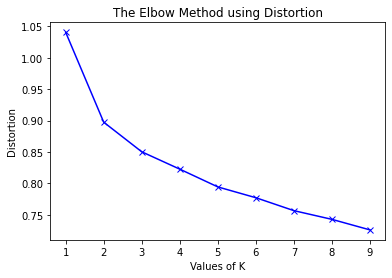

In [136]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [137]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 360.6208801269531
2 : 262.5058898925781
3 : 233.98175048828125
4 : 216.16943359375
5 : 202.4898223876953
6 : 192.6854248046875
7 : 181.16964721679688
8 : 174.60885620117188
9 : 167.81735229492188


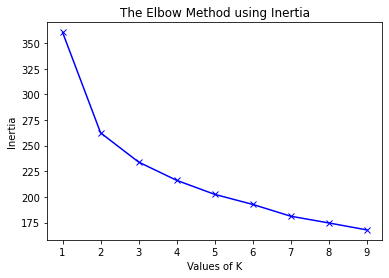

In [138]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [139]:
kcluster[2]

KMeans(n_clusters=3)

In [140]:
print(kcluster[1].labels_)
print(kcluster[1].cluster_centers_)

[1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0
 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1
 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0
 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1
 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1]
[[-6.04611158e-01  3.35464254e-03 -2.11566985e-02  4.06087143e-03
   1.88061763e-02 -2.03137330e-04 -1.03266165e-02  1.21983103e-02
  -2.89519108e-03  8.22299346e-03]
 [ 5.67594230e-01 -3.14916251e-03  1.98615734e-02 -3.81235546e-03
  -1.76545549e-02  1.90692561e-04  9.69449989e-03 -1.14516821e-02
   2.71795574e-03 -7.71955634e-03]]


In [141]:
label = kcluster[1].labels_
cent =kcluster[1].cluster_centers_

In [142]:
clu,count = {},0
for i in range(len(t)):
    clu[count]= 1-(dot(cent[label[i]], p_dims[i])/(norm(cent[label[i]])*norm(p_dims[i])))
    count+=1

In [143]:
clu

{0: 0.07278174161911011,
 1: 0.6645200550556183,
 2: 0.9177575930953026,
 3: 0.6684791147708893,
 4: 0.028207838535308838,
 5: 0.4611285328865051,
 6: 0.8131525814533234,
 7: 0.5294530987739563,
 8: 0.1862391233444214,
 9: 0.6817451417446136,
 10: 0.53427654504776,
 11: 0.4623730182647705,
 12: 0.3914438486099243,
 13: 0.2251605987548828,
 14: 0.5180279910564423,
 15: 0.29515981674194336,
 16: 0.02319544553756714,
 17: 0.2634388208389282,
 18: 0.34066957235336304,
 19: 0.30371588468551636,
 20: 0.138319194316864,
 21: 0.7994605749845505,
 22: 0.5455530881881714,
 23: 0.34887295961380005,
 24: 0.9549162909388542,
 25: 0.6298746764659882,
 26: 0.3013024926185608,
 27: 0.8305161893367767,
 28: 0.6677374839782715,
 29: 0.5437714159488678,
 30: 0.5207525491714478,
 31: 0.3031719923019409,
 32: 0.5443854928016663,
 33: 0.21054613590240479,
 34: 0.37183457612991333,
 35: 0.48238956928253174,
 36: 0.13671749830245972,
 37: 0.2839401960372925,
 38: 0.7707042545080185,
 39: 0.5994268953800201,
 

In [144]:
a=sorted(clu.items(), key = lambda kv:[kv[1], kv[0]])

In [145]:
ref_lines = len(ref.split("।"))
doc_line=len(val_li)

top_sen =[]
for i in range(int(doc_line*0.5)):
    top_sen.append(a[i][0])
    
to = sorted(top_sen)

summry = ""
for  i in to:
    print(li[i])
    summry += li[i]

रघुवंशं महाकविकालिदासेन विरचितं किञ्चन महाकाव्यमस्ति।
तदुतरं रामवंश्यानां ततन्नृपाणां चरितानि उपन्यस्तानि।
रघुवंशे येषां राज्ञां वर्णनानि सन्ति, तेषां रामायणवर्णितनपैः सह भेदः आपतति, परन्तु वायुपुराण-वर्णितानुसारं रामवंशावल्या सह रघुवंशवर्णित-वंशावली भूयसा सामञ्जस्यं धारयति।
वंशस्य कर्तारमनन्तकीर्ति सुदक्षिणायां तनयं ययाचे।
महाकाव्यत्वेनमहाकाव्यस्य लक्षणानुसारं यानि लक्षणानि आवश्यकतानि, तानि रघुवंशे दरीदृश्यन्ते।
अस्मिन् अङ्गी वीरो रसः।
शृङ्गार-करुण-शान्तादयः रसाः, नाटकस्य सन्धयः च अङ्गानि यथास्थाने विहिताः।
इदं च रामायणादिरूपाम् इतिहासकथाम् आश्रित्य प्रणीतम्।
अत्र परमानन्ददायकाः धर्मार्थकामोक्षरूपाश्चत्वारो वर्गाः विहिताः।
प्रारम्भेऽस्मिन् पार्वती-परमेश्वरयोः नमस्कारात्मक मङ्गलाचरम् अस्ति।
सर्गाणाम् आदिमध्येषु एकविधम् अन्तेषु अन्यविधं वृत्तम् अस्ति।
महाकाव्ये कथनीयाश्च सन्ध्यासूर्येन्दुरात्रिप्रदोषादयः सर्व एव विषयाः यथास्थानां वर्णिताः।
दक्षिणप्रान्ते अपि कश्वन प्रवादः अस्ति यत्, सः दक्षिणात्यः आसीत् इति।
हिन्दीभाषायाम् अपि रघुवंशस्य टीका वर्तते, यस्याः नाम भावर्थदीपिकाभाषाटीका इति।


In [146]:
summry

'रघुवंशं महाकविकालिदासेन विरचितं किञ्चन महाकाव्यमस्ति।तदुतरं रामवंश्यानां ततन्नृपाणां चरितानि उपन्यस्तानि।रघुवंशे येषां राज्ञां वर्णनानि सन्ति, तेषां रामायणवर्णितनपैः सह भेदः आपतति, परन्तु वायुपुराण-वर्णितानुसारं रामवंशावल्या सह रघुवंशवर्णित-वंशावली भूयसा सामञ्जस्यं धारयति।वंशस्य कर्तारमनन्तकीर्ति सुदक्षिणायां तनयं ययाचे।महाकाव्यत्वेनमहाकाव्यस्य लक्षणानुसारं यानि लक्षणानि आवश्यकतानि, तानि रघुवंशे दरीदृश्यन्ते।अस्मिन् अङ्गी वीरो रसः।शृङ्गार-करुण-शान्तादयः रसाः, नाटकस्य सन्धयः च अङ्गानि यथास्थाने विहिताः।इदं च रामायणादिरूपाम् इतिहासकथाम् आश्रित्य प्रणीतम्।अत्र परमानन्ददायकाः धर्मार्थकामोक्षरूपाश्चत्वारो वर्गाः विहिताः।प्रारम्भेऽस्मिन् पार्वती-परमेश्वरयोः नमस्कारात्मक मङ्गलाचरम् अस्ति।सर्गाणाम् आदिमध्येषु एकविधम् अन्तेषु अन्यविधं वृत्तम् अस्ति।महाकाव्ये कथनीयाश्च सन्ध्यासूर्येन्दुरात्रिप्रदोषादयः सर्व एव विषयाः यथास्थानां वर्णिताः।दक्षिणप्रान्ते अपि कश्वन प्रवादः अस्ति यत्, सः दक्षिणात्यः आसीत् इति।हिन्दीभाषायाम् अपि रघुवंशस्य टीका वर्तते, यस्याः नाम भावर्थदीपिकाभाषाटीका इति।हिन्यां रघुवं

In [147]:
from rouge import Rouge
def get_rogue(summry, ref):
    rouge = Rouge()
    l = rouge.get_scores(summry, ref)
    
    list_p = []
    list_r = []
    list_f = []

    iterate = l[0]

    for key in iterate.keys():
        list_p.append(iterate[key]['p'])
        list_r.append(iterate[key]['r'])
        list_f.append(iterate[key]['f'])

    return list_r, list_p, list_f

In [148]:
def plot(list_r, list_p, list_f):
    plotdata = pd.DataFrame({

        "r":list_r,

        "p":list_p,

        "f":list_f},

        index= ['rouge-1','rouge-2','rouge-l'])

    plotdata.plot(kind="bar",figsize=(8, 4))
    ax = plt.gca()
    ax.set_ylim([0, 1])


    plt.title("Newly trained RoBERTa")
    plt.ylabel("Accuracy ")
    plt.xticks(rotation=40)


    for bar in ax.patches:
        bar_value = round(bar.get_height(),2)
        text = f'{bar_value:,}'
        text_x = bar.get_x() + bar.get_width() / 2
        text_y = bar.get_y() + bar_value + .05
        bar_color = bar.get_facecolor()
        ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
              size=11, rotation = 0)

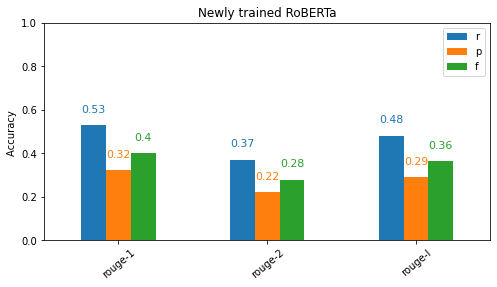

In [149]:
a,b,c = get_rogue(summry, ref)
plot(a,b,c)